# Visualization in Python
The options to visualize data in python are as abundant in python as in MATLAB. Most of the functionality we are going to use is found in `matplotlib.pyplot`. 
*Warning: the package `pylab` contains functions from `matplotlib.pyplot` and `numpy`, making it feel more like MATLAB. You can use either package, but be aware, some sources say that using `pylab` is no longer recommended. However, it shouldn't be a problem until it is.*

**The information below draws liberally from** https://matplotlib.org/users/pyplot_tutorial.html
## Functions in Python
### Plot()
Let's see what `plot()` is like in `matplotlib.pyplot`. The syntax is similar to MATLAB's:

```plot(x,y,’<options>’)```

`options` allow you to specify line:
- type (`.`, `-`, `--`, `o`, `s`)
- color (`r`, `g`, `b`, `c`, `m`, `y`, `k`, `w`). 

Plot will always connect the plotted points



Text(0, 0.5, 'altitude')

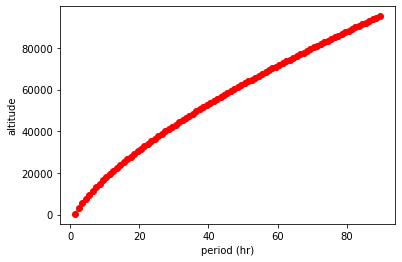

In [6]:
import numpy as np
import matplotlib.pyplot as mp
G = 6.67*10**(-11)
M = 5.98*10**(24)
R = 6.371*10**6
x = np.arange(1.5,90,1)
y = (G*M*(3600*x)**2/(4*np.pi**2))**(1/3)-R
mp.plot(x,y/1000,'r--o')
mp.xlabel("period (hr)")
mp.ylabel("altitude")


### Scatter()
`scatter()` functions just as `plot()` but it won't connect the dots

Text(0, 0.5, 'altitude')

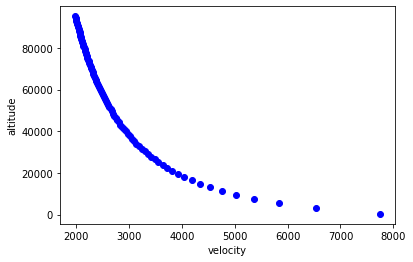

In [7]:
v = np.sqrt(G*M/(R+y))
mp.scatter(v,y/1000,color='blue')
mp.xlabel('velocity');
mp.ylabel('altitude')

You can even include texts and annonations within the graph itself

Text(5, 5000, 'no satellites below this point')

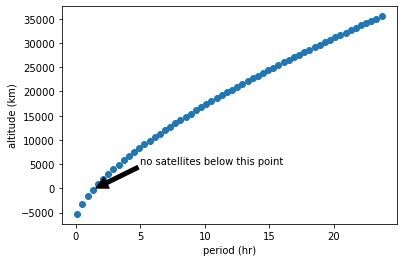

In [8]:
fig, ax = mp.subplots() #subplots does create an array of plots, but the default arguments to subplots is col=1, row=1

t = np.arange(0.1, 24,0.4)
y = (G*M*(3600*t)**2/(4*np.pi**2))**(1/3)-R
ax.scatter(t, y/1000)
mp.xlabel('period (hr)')
mp.ylabel('altitude (km)')
x0 = 1.5
y0= (G*M*(3600*x0)**2/(4*np.pi**2))**(1/3)-R
ax.annotate('no satellites below this point', xy=(1.5,0), xytext=(5, 5000),\
            arrowprops=dict(facecolor='black', shrink=0.01),)


### Just a note:
You may need to use `show()` to display the plot. 

**Why is that? That seems unnecessary?**
Maybe, but this does allow you to create the entire figure (specifying labels, titles, etc) before it being displayed. You should probably only call `show()` at the end of the program

**But I want to see it now!**
Using `draw()` will draw the graph immediately (that is if you use pyplot instead of pylab)

### Histograms
Producing histograms in python can be confusing. There is a `histogram` function in `numpy`, but it will not graph the histogram for you.

In [ ]:
rng = np.random.RandomState(10) # ensures consistent seeding
hist, bins = np.histogram(rng.normal(size=1000))
print(hist.sum())
print(bins)

You have to load up `matplotlib.pyplot` to graph the histogram (though it does use `np.histogram` to do this).

In [ ]:
a = np.hstack((rng.normal(size=1000), rng.normal(5, 2, size=1000))) #creates two normal distributions
h1=mp.hist(a, bins='auto')  # arguments are passed to np.histogram
mp.title("Histogram with 'auto' bins")
mp.show()

### Multiple figures and axes
You can define subplot in a very similar manner as in MATLAB by using the `subplot` command in `matplotlib`. Below is an example of how it works. We will graph several different types of plots in one figure

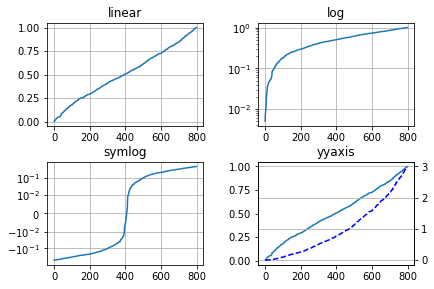

In [9]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval
y = np.random.normal(loc=0.5, scale=0.4, size=1000) #normal distribution with a mean of 0.5 and a standard dev. of 0.4
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
mp.figure(1)
# can graph in subplots. Below, 221 specifies a two by two grid, the 1 being the first spot in the grid.
# linear
mp.subplot(221)
mp.plot(x, y)
mp.yscale('linear')
mp.title('linear')
mp.grid(True)

# log
mp.subplot(222)
mp.plot(x, y)
mp.yscale('log')
mp.title('log')
mp.grid(True)

# symmetric log
mp.subplot(223)
mp.plot(x, y - y.mean())
mp.yscale('symlog', linthresh=0.01)
mp.title('symlog')
mp.grid(True)

# yyaxis
mp.subplot(224)
ax = mp.gca() #grabs current axis
ax2 = ax.twinx() # makes a twin axis in some plot
# using ax.plot allows you to plot using a specific axis
ax.plot(x, y)
ax2.plot(x,3*y**2,'b--')

mp.title('yyaxis')
mp.grid(True)

## strictly for formatting purposes_____
from matplotlib.ticker import NullFormatter 
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
mp.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
mp.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.35)
#______
mp.show()

## 3-Dimensional Plotting
Originally `matplotlib` was built only with 2-D plotting capabilities, but 3-D capabilities have been added. The following example was taken from [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html). Please visit that sight for further details.

In [10]:
# Preamble for setting up 3D graphing
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

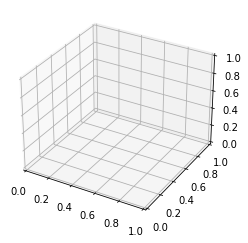

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

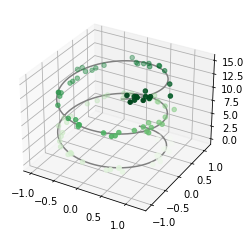

In [14]:
# Preamble for setting up 3D graphing
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()